# ITCS 3156 Final Project
## Pokemon Image Classification

In [ ]:
# Installs the necessary libraries (Can be commented out if already installed)

!pip install tensorflow
!pip install keras

# Uncomment the following below to uninstall libraries if needed

# !pip uninstall keras -y
# !pip uninstall keras-nightly -y
# !pip uninstall keras-Preprocessing -y
# !pip uninstall keras-vis -y
# !pip uninstall tensorflow -y

In [1]:
# Imports the necessary libraries

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

import os

In [ ]:
# Shows the installed tensorflow version to confirm it was successfully installed

print(tf.__version__)

In [2]:
# Creates the training (70%) and validation dataset (30%) of the images

data = 'images'

batch_size = 32
img_height = 120
img_width = 120

final_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39696 files belonging to 1711 classes.
Found 39696 files belonging to 1711 classes.
Using 27788 files for training.
Found 39696 files belonging to 1711 classes.
Using 11908 files for validation.


In [3]:
# Prints the class names (Each Pokemon's Pokedex number)

class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '10050', '10051', '10052', '10053', '10054', '10055', '10056', '10057', '10058', '10059', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10069', '10070', '10071', '10072', '10073', '10074', '10075', '10076', '10077', '10078', '10079', '10080', '10081', '10082', '10083', '10084', '10085', '10086', '10087', '10088', '10089', '10090', '10091', '10092', '10093', '10094', '10095', '10096', '10097', '10098', '10099', '101', '10100', '10101', '10102', '10103', '10104', '10105', '10106', '10107', '10108

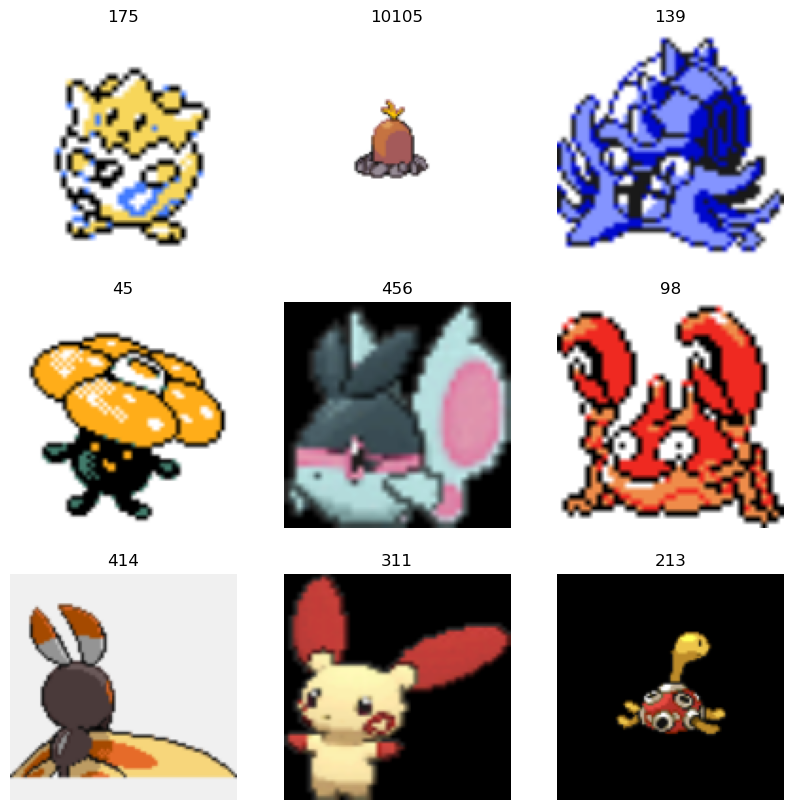

In [7]:
# Displays random images from the training dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
# Creates the sequential model

num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [5]:
# Compiles the model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [6]:
# Trains the model

epochs = 13

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 180s 203ms/step - accuracy: 0.0040 - loss: 7.0317 - val_accuracy: 0.0240 - val_loss: 6.2160
Epoch 2/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 133s 153ms/step - accuracy: 0.0437 - loss: 5.7908 - val_accuracy: 0.1198 - val_loss: 5.1298
Epoch 3/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 133s 153ms/step - accuracy: 0.1849 - loss: 4.3010 - val_accuracy: 0.2535 - val_loss: 4.1733
Epoch 4/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 138s 159ms/step - accuracy: 0.3756 - loss: 2.9990 - val_accuracy: 0.3551 - val_loss: 3.6897
Epoch 5/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 128s 148ms/step - accuracy: 0.5267 - loss: 2.1401 - val_accuracy: 0.4315 - val_loss: 3.4182
Epoch 6/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 115s 133ms/step - accuracy: 0.6372 - loss: 1.5657 - val_accuracy: 0.4770 - val_loss: 3.5141
Epoch 7/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 116s 133ms/step - accuracy: 0.7140 - loss: 1.1884 - val_accuracy: 0.4886 - val_loss: 3.7794
Epoch 8/13
869/869 ━━━━━━━━━━━━━━━━━━━━ 119s 137ms/step - accuracy: 0.7712 -

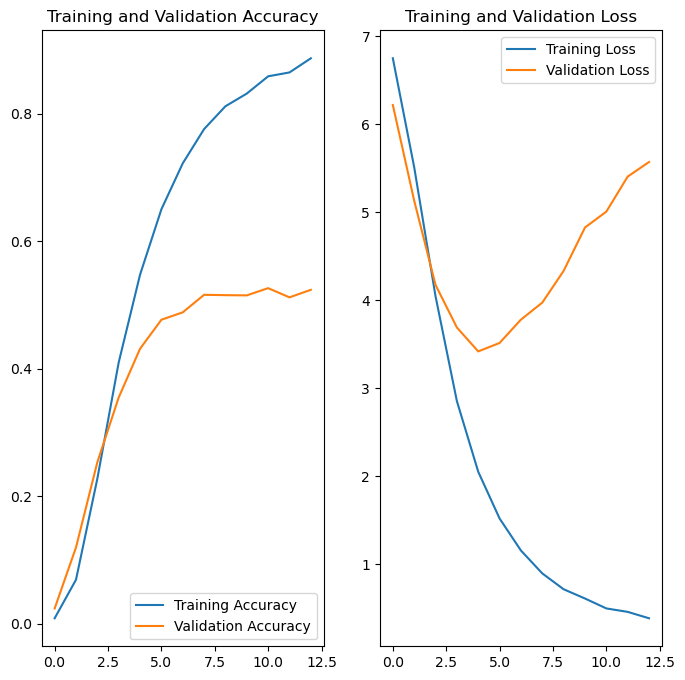

In [8]:
# Displays training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

94 Mega Gengar


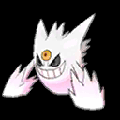

In [37]:
# Shows image of Pokemon in Test 1

print("94 Mega Gengar")
tf.keras.utils.load_img('images/94-mega/94-mega2497-94-mega.png', target_size=(img_height, img_width))

In [10]:
# Test 1

img = tf.keras.utils.load_img(
    'images/94-mega/94-mega2497-94-mega.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
This image most likely belongs to 94-mega with a 100.00 percent confidence.


673 Gogoat


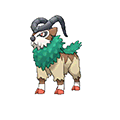

In [36]:
# Shows image of Pokemon in Test 2

print("673 Gogoat")
tf.keras.utils.load_img('images/673/67326693-673.png', target_size=(img_height, img_width))

In [34]:
# Test 2

img = tf.keras.utils.load_img(
    'images/673/67326693-673.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image most likely belongs to 673 with a 64.53 percent confidence.
